<a href="https://colab.research.google.com/github/NavyaNuthalapati/Navya-VEC/blob/main/HCV_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_classifier = RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
import pickle

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/HCV-Egypt-Data.csv")


In [ ]:
df.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1


In [ ]:
df

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,44,1,29,1,2,2,2,1,1,1,...,63,44,45,387795,55938,5,5,5,15,4
1381,55,1,34,1,2,2,1,1,1,1,...,97,64,41,481378,152961,393339,73574,236273,10,2
1382,42,1,26,2,2,1,1,1,2,1,...,87,39,24,612664,572756,806109,343719,160457,6,2
1383,52,1,29,2,1,1,2,2,2,1,...,48,81,43,139872,76161,515730,2460,696074,15,3


In [ ]:
df.shape

(1385, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               1385 non-null   int64  
 1   Gender                            1385 non-null   int64  
 2   BMI                               1385 non-null   int64  
 3   Fever                             1385 non-null   int64  
 4   Nausea/Vomting                    1385 non-null   int64  
 5   Headache                          1385 non-null   int64  
 6   Diarrhea                          1385 non-null   int64  
 7   Fatigue & generalized bone ache   1385 non-null   int64  
 8   Jaundice                          1385 non-null   int64  
 9   Epigastric pain                   1385 non-null   int64  
 10  WBC                               1385 non-null   int64  
 11  RBC                               1385 non-null   float64
 12  HGB   

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Age                                 0
Gender                              0
BMI                                 0
Fever                               0
Nausea/Vomting                      0
Headache                            0
Diarrhea                            0
Fatigue & generalized bone ache     0
Jaundice                            0
Epigastric pain                     0
WBC                                 0
RBC                                 0
HGB                                 0
Plat                                0
AST 1                               0
ALT 1                               0
ALT4                                0
ALT 12                              0
ALT 24                              0
ALT 36                              0
ALT 48                              0
ALT after 24 w                      0
RNA Base                            0
RNA 4                               0
RNA 12                              0
RNA EOT                             0
RNA EF      

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt


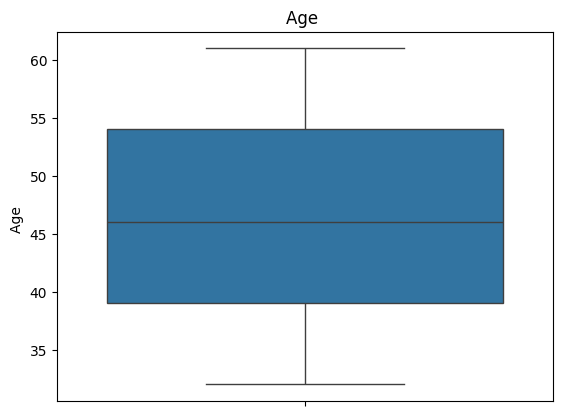

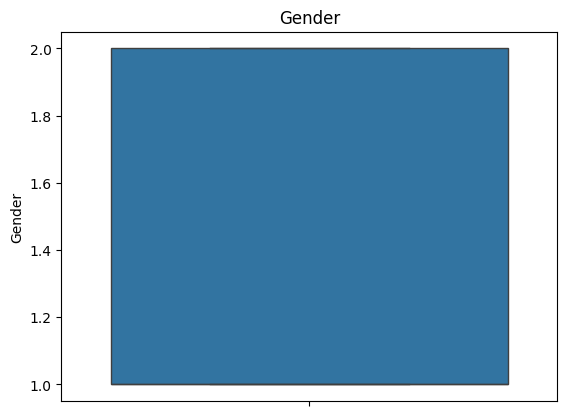

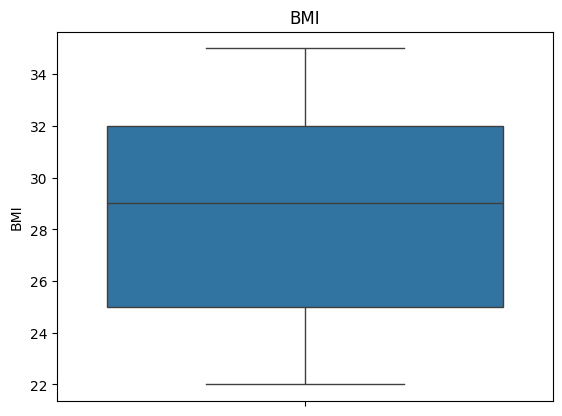

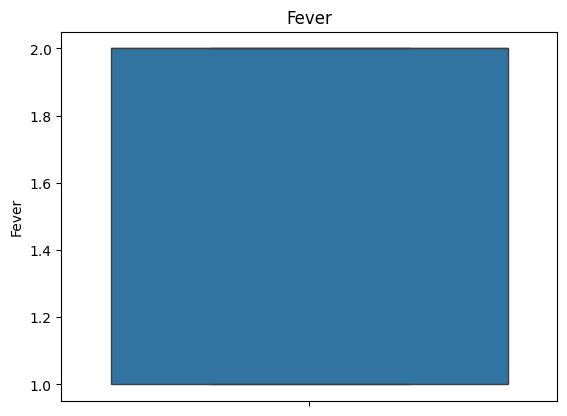

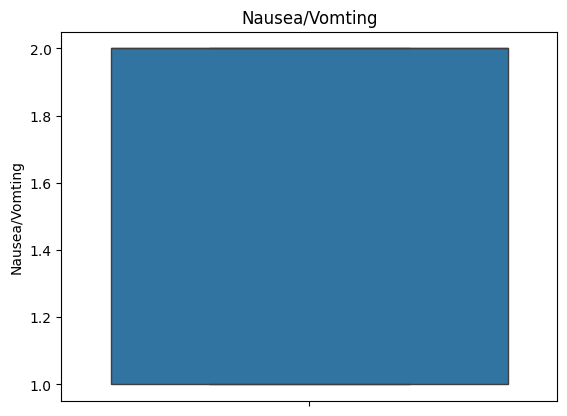

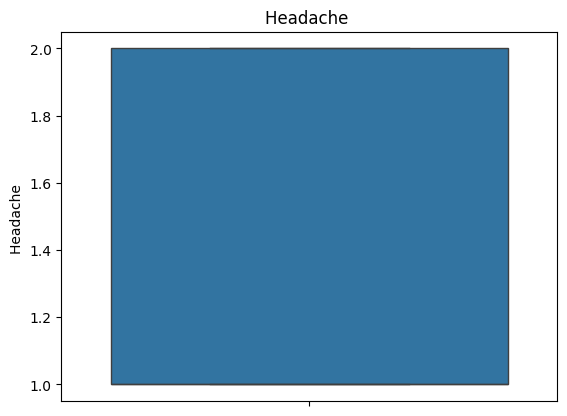

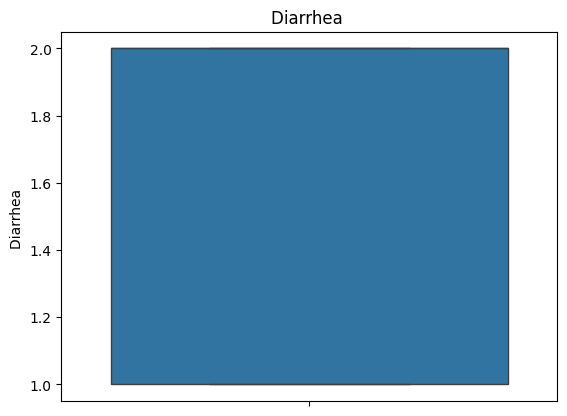

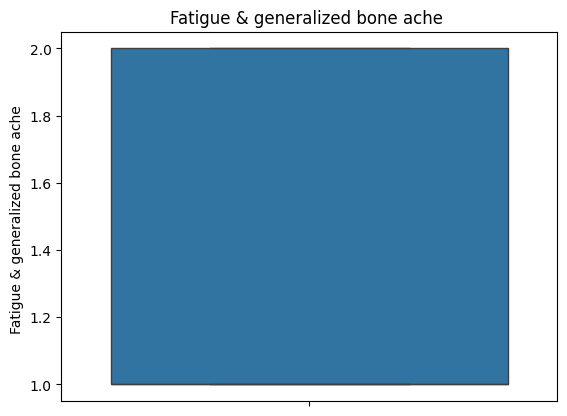

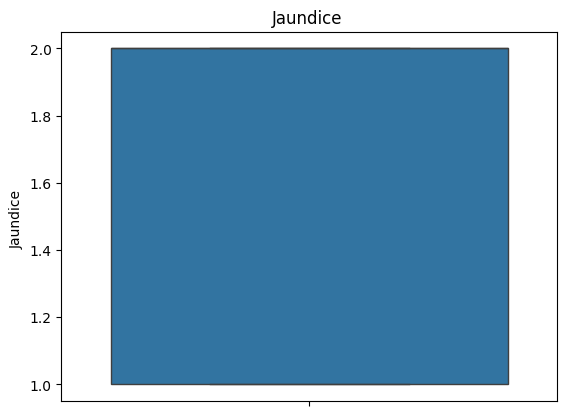

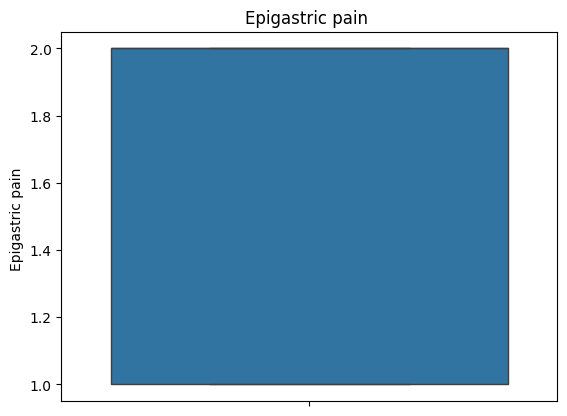

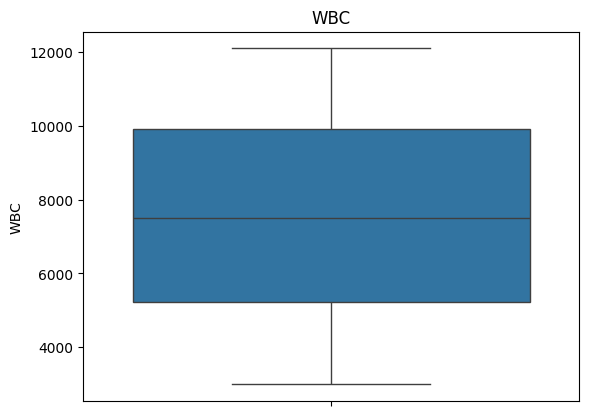

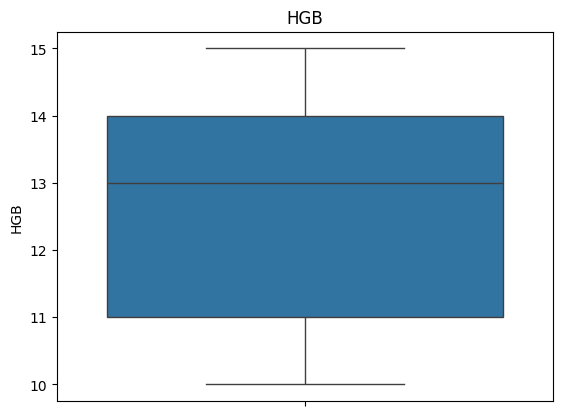

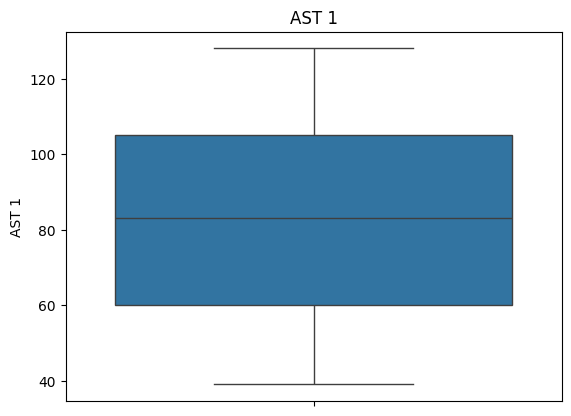

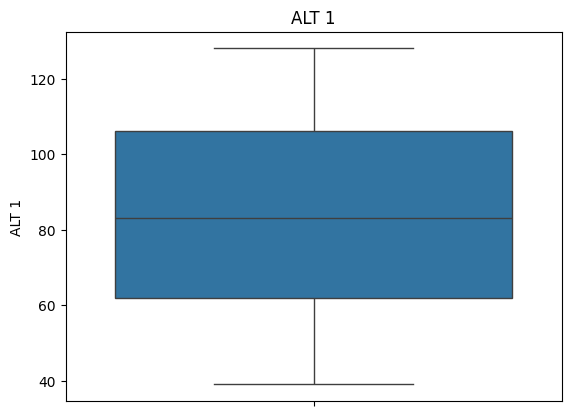

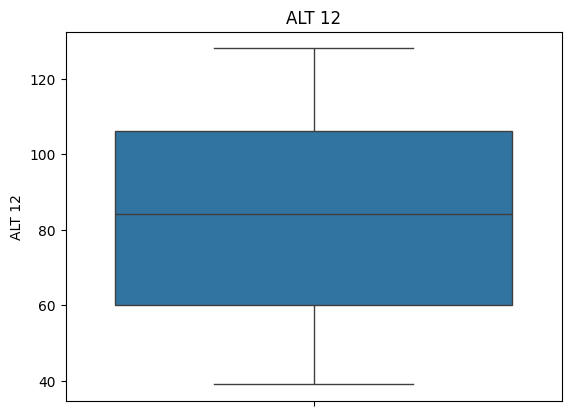

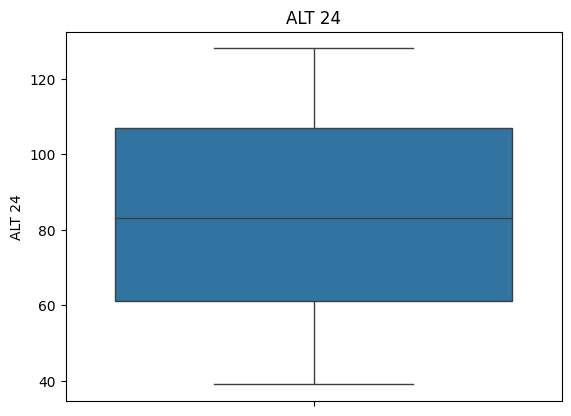

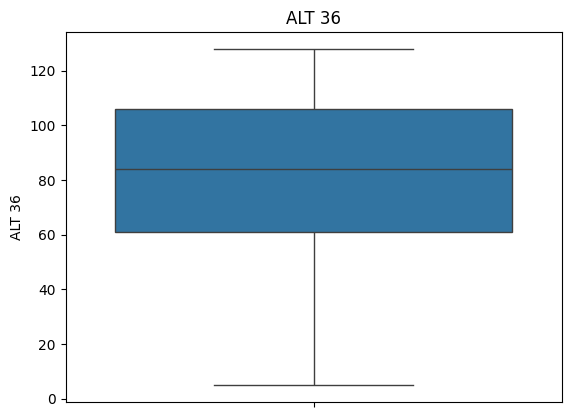

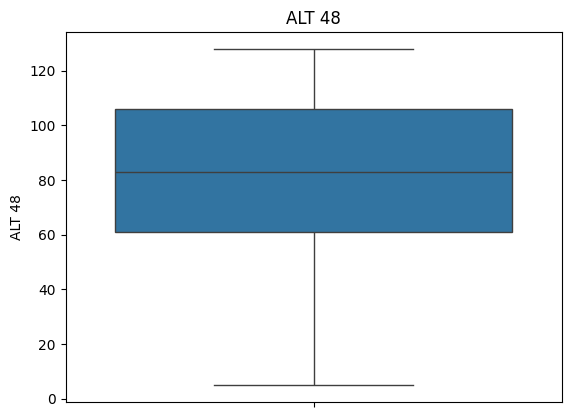

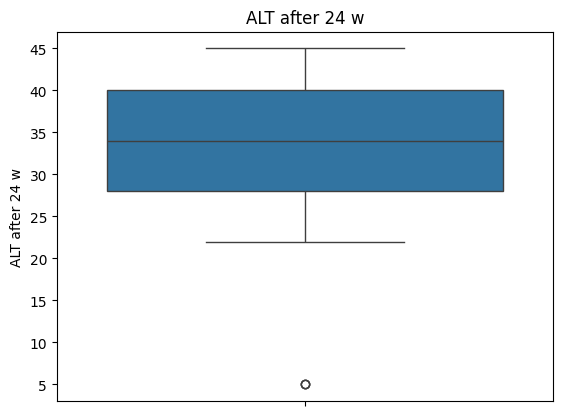

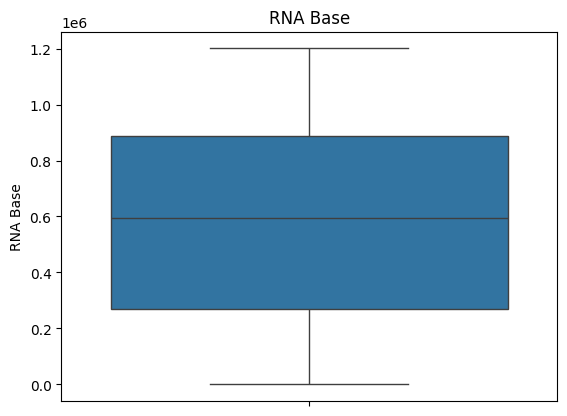

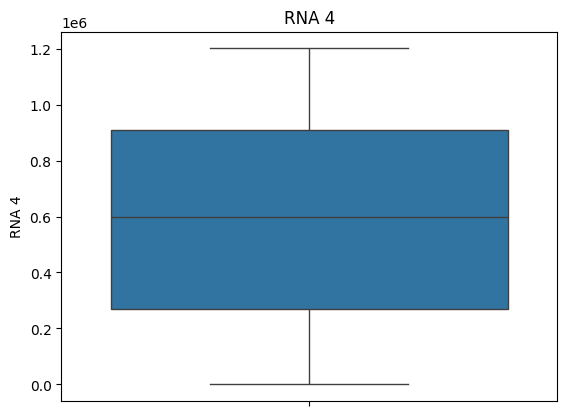

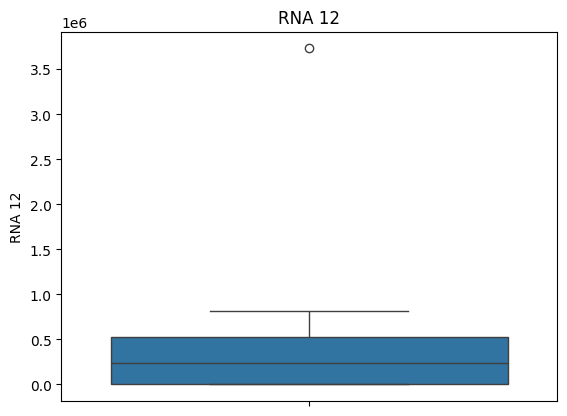

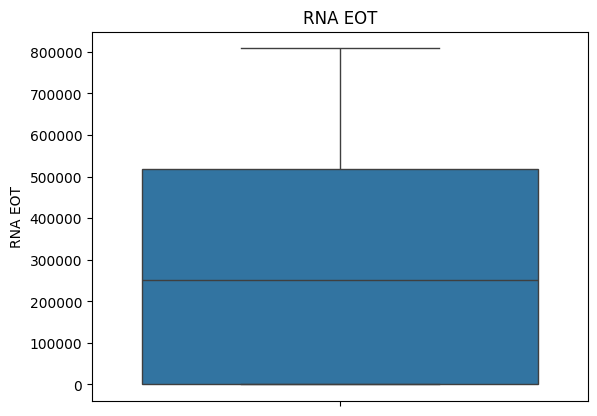

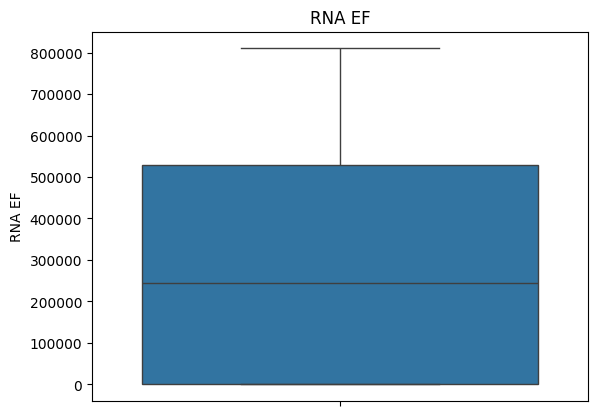

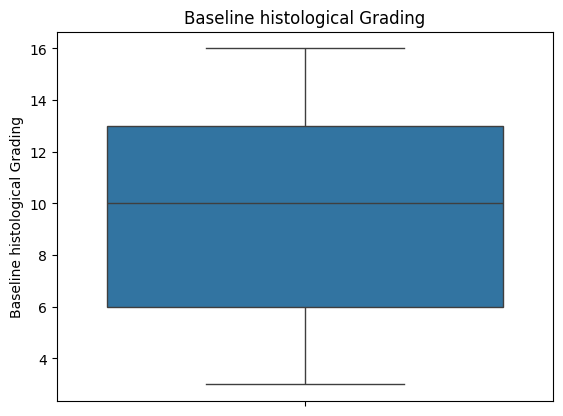

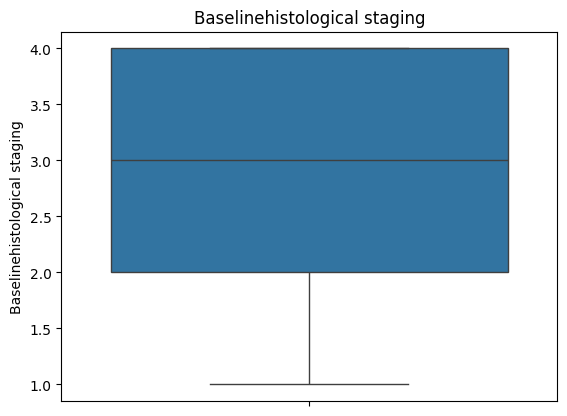

In [ ]:
for i in df.columns:
  if (df[i].dtype)=='int64':
      sns.boxplot(df[i])
      plt.title(i)
      plt.show()

([<matplotlib.axis.XTick at 0x79d6e1b58910>,
 [Text(1, 0, 'Absent'), Text(2, 0, 'present')])

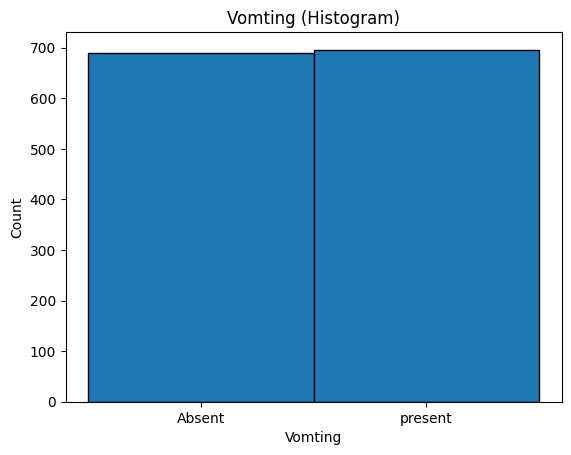

In [ ]:
plt.hist(df['Nausea/Vomting'], bins=[0.5, 1.5, 2.5], edgecolor='black')
plt.title( 'Vomting (Histogram)')
plt.xlabel ('Vomting')
plt.ylabel ('Count')
plt.xticks([1, 2], ['Absent', 'present'])


<Axes: xlabel='BMI', ylabel='Baselinehistological staging'>

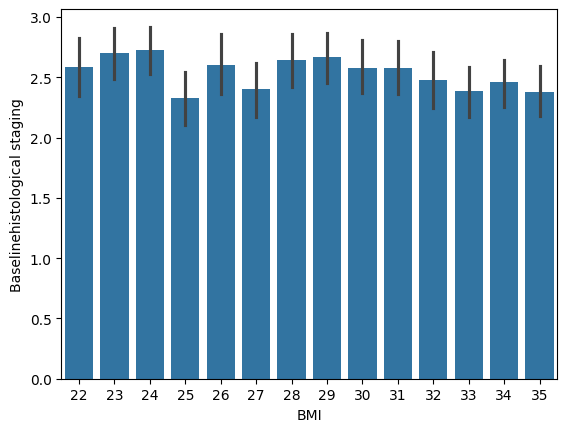

In [ ]:
sns.barplot(x='BMI',y='Baselinehistological staging',data=df)

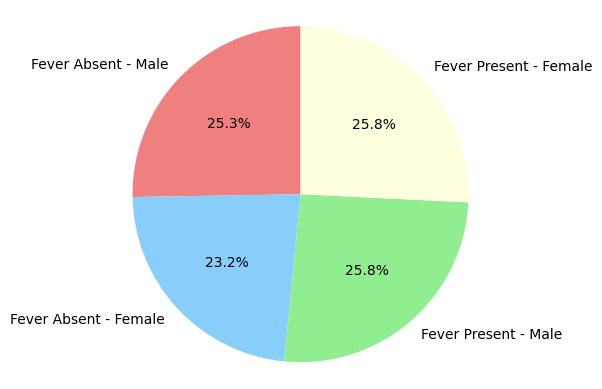

In [ ]:
counts = df groupby([ 'Fever', 'Gender']). size() .unstack()

labels = ['Fever Absent - Male', 'Fever Absent - Female', 'Fever Present - Male', 'Fever Present - Female']
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightyellow']
fig, ax = plt.subplots ()
ax.pie(counts.values.flatten(), labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax.axis('equal')
plt.show ( )


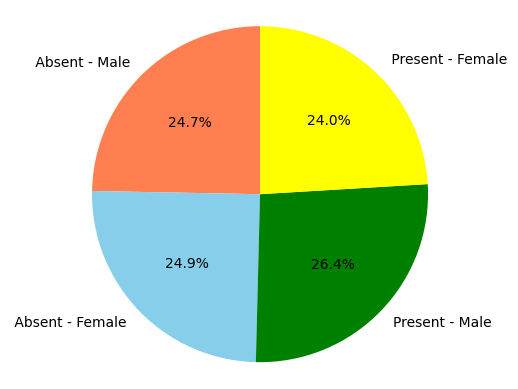

In [ ]:
counts = df. groupby (['Epigastric pain ', 'Gender']). size().unstack()

labels = [' Absent - Male', ' Absent - Female', 'Present - Male', ' Present - Female']
colors = ['coral', 'skyblue', 'green', 'yellow']

fig, ax = plt.subplots ()
ax.pie(counts.values.flatten(), labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax.axis('equal')
plt. show()

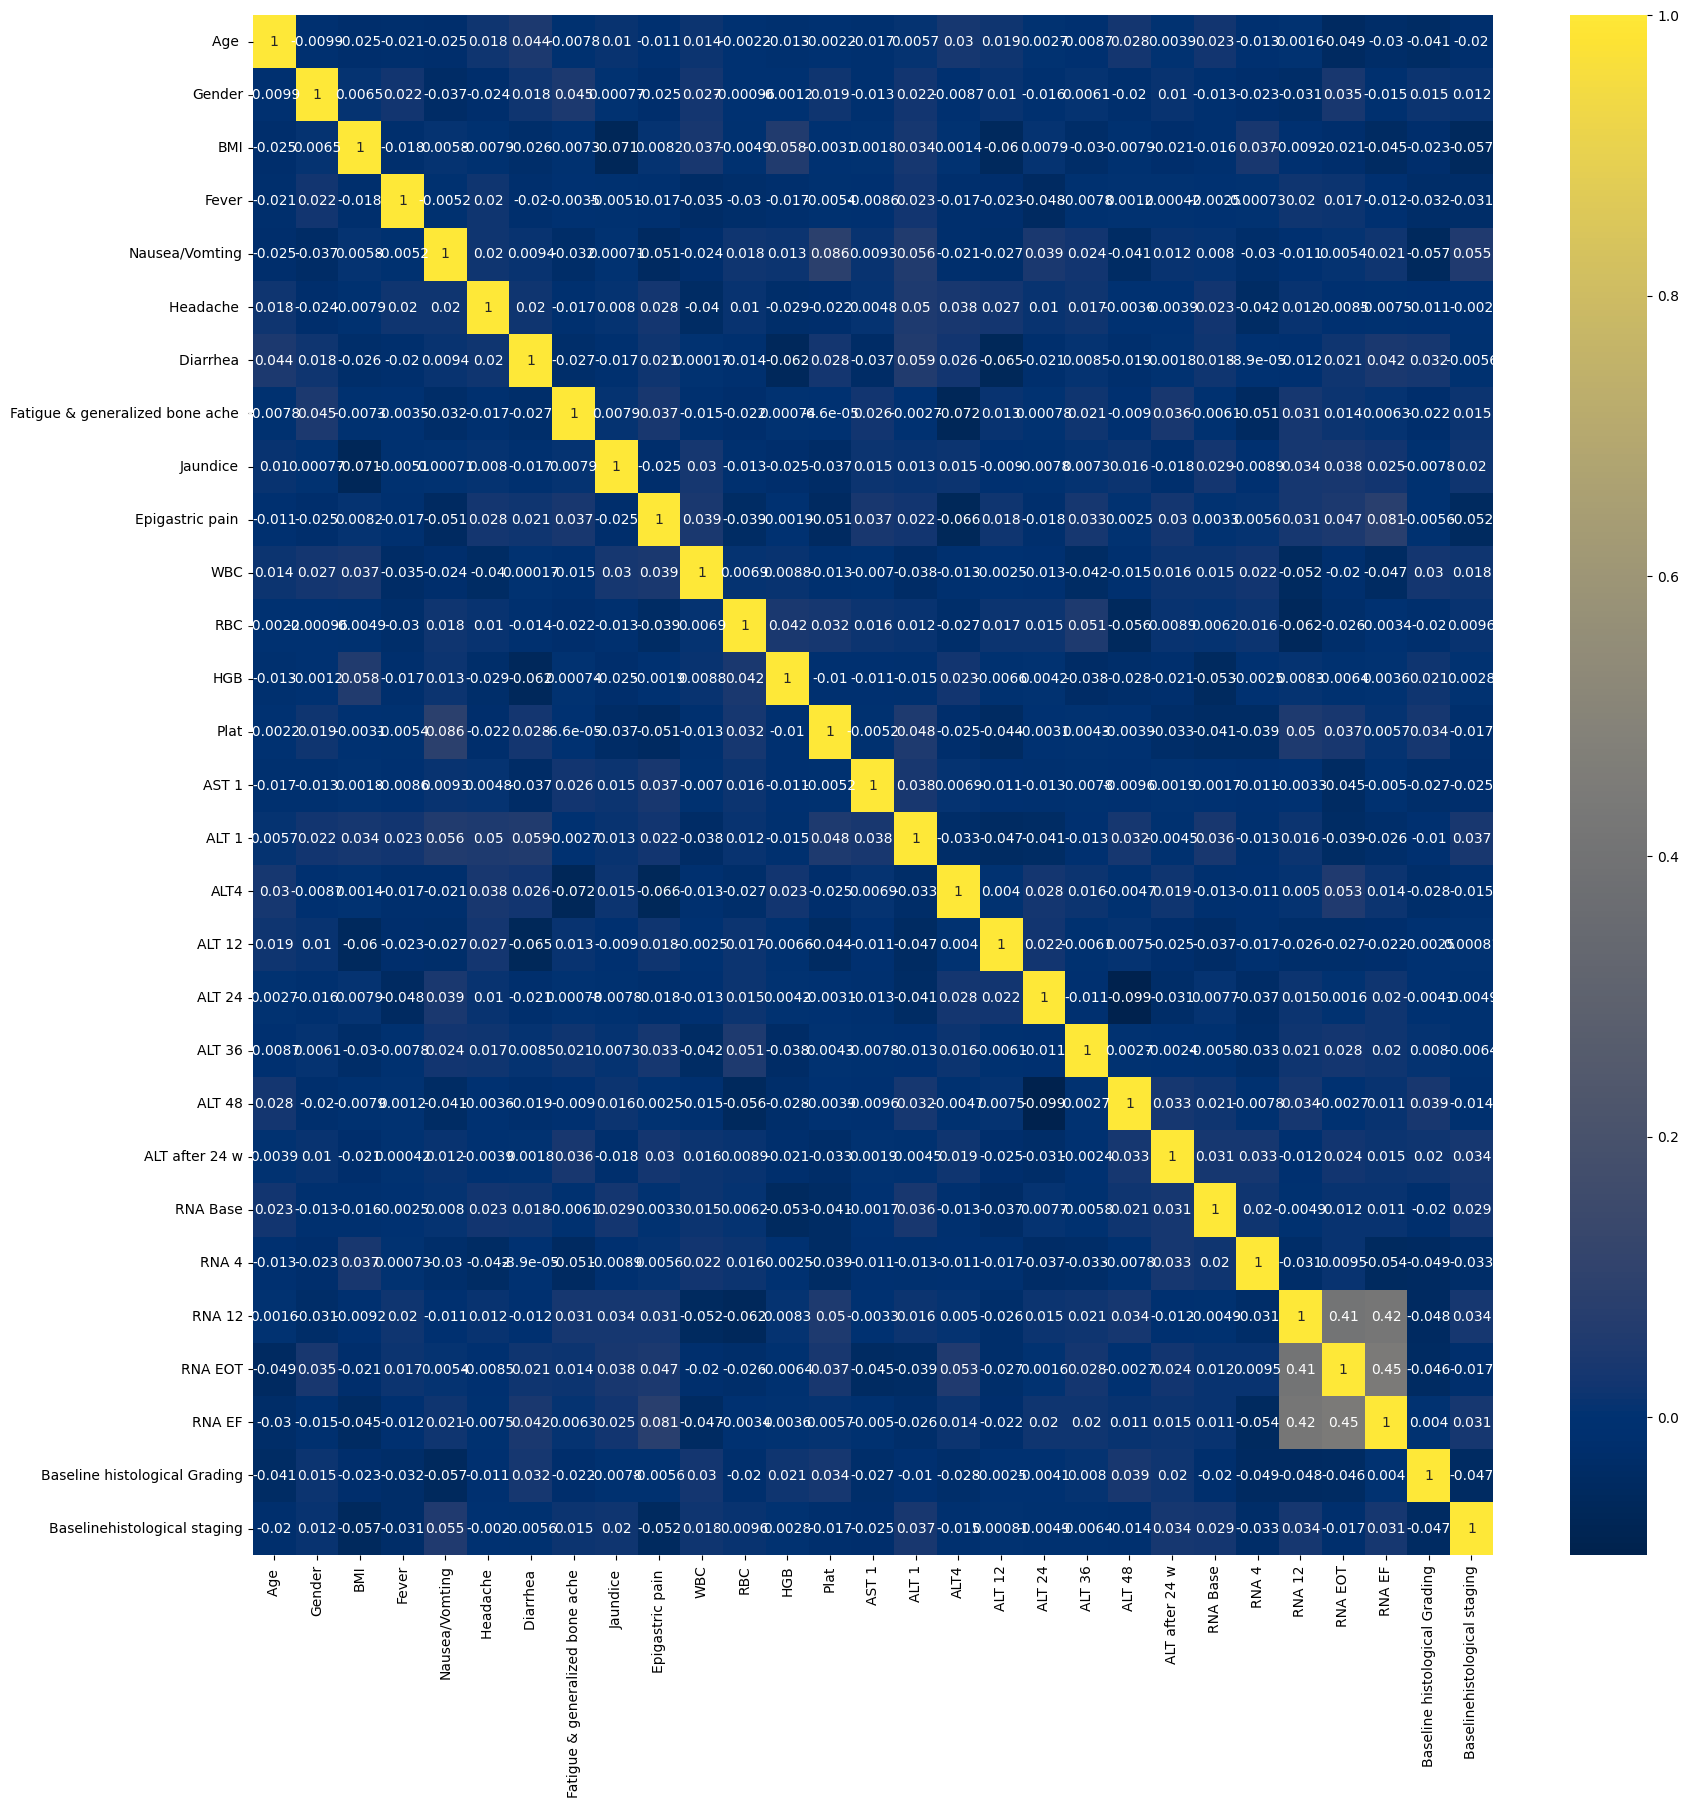

In [ ]:
import seaborn as sns
correlation = df.corr()
top_corr_features = correlation.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True, cmap="cividis")

In [ ]:
import pandas as pd
correlation_matrix = df.corr()["Baselinehistological staging"].sort_values(ascending=False)
print(correlation_matrix)

Baselinehistological staging        1.000000
Nausea/Vomting                      0.054906
ALT 1                               0.036867
RNA 12                              0.034449
ALT after 24 w                      0.033919
RNA EF                              0.030519
RNA Base                            0.029411
Jaundice                            0.020219
WBC                                 0.017945
Fatigue & generalized bone ache     0.014563
Gender                              0.011955
RBC                                 0.009623
HGB                                 0.002752
ALT 12                              0.000809
Headache                           -0.001996
ALT 24                             -0.004888
Diarrhea                           -0.005639
ALT 36                             -0.006430
ALT 48                             -0.013533
ALT4                               -0.014997
Plat                               -0.017284
RNA EOT                            -0.017486
Age       

In [ ]:
feature=["BMI", "Fever", "Diarrhea ", "Epigastric pain ", "WBC", "HGB", "Plat", "ALT 1", "ALT4", "ALT 24", "RNA Base", "RNA 4",
         "RNA EF"]
X=df[ feature]
X

,BMI,Fever,Diarrhea,Epigastric pain,WBC,HGB,Plat,ALT 1,ALT4,ALT 24,RNA Base,RNA 4,RNA EF
0,35,2,1,2,7425,14,112132.0,84,52.0,81,655330,634536,5
1,29,1,1,1,12101,10,129367.0,123,95.0,113,40620,538635,31085
2,33,2,2,1,4178,12,151522.0,49,95.0,116,571148,661346,558829
3,33,1,2,1,6490,10,146457.0,64,109.0,88,1041941,449939,582301
4,32,1,1,2,3661,11,187684.0,104,67.0,120,660410,738756,242861
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,29,1,2,1,7044,15,202520.0,59,78.0,127,387795,55938,5
1381,34,1,1,1,6207,10,115776.0,102,65.0,108,481378,152961,236273
1382,26,2,1,1,4913,14,128354.0,93,123.0,116,612664,572756,160457
1383,29,2,2,1,7257,10,205908.0,97,104.0,47,139872,76161,696074


In [ ]:
df['Baselinehistological staging'].replace([1],[0],inplace=True)
df['Baselinehistological staging'].replace([2],[1],inplace=True)
df['Baselinehistological staging'].replace([3],[1],inplace=True)
df['Baselinehistological staging'].replace([4],[1],inplace=True)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
smote_sampler = SMOTE(random_state=42)
y=df['Baselinehistological staging']

In [ ]:
X_resampled, y_resampled = smote_sampler.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

In [ ]:
y_train.value_counts()

Baselinehistological staging
0    734
1    734
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
from sklearn.preprocessing import StandardScaler
standard_sc = StandardScaler()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
X_train = pd.read_csv("/content/HCV-Egypt-Data.csv")
X_test = pd.read_csv("/content/HCV-Egypt-Data.csv")
standard_sc = StandardScaler()
X_train = standard_sc.fit_transform(X_train)
X_test = standard_sc.transform(X_test)

knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn = knn. fit(X_train,y_train)


In [ ]:
pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(pred,y_test)
print(accuracy_score(pred, y_test))

0.653968253968254


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier (random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model. predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score (y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report (y_test, y_pred)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.6349206349206349

Confusion Matrix:
 [[209 106]
 [124 191]]


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred1 = RF.predict(X_test)
score = RF.score (X_test,y_test)

In [ ]:
score

0.7746031746031746

XGB Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
from sklearn.svm import SVC
mode=SVC()
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model. fit(X_train, y_train)
y_pred1=xgb_model. predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred1)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred1)

In [ ]:
classification_rep = classification_report(y_test,y_pred1)

In [ ]:
print ("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("InClassification Report:\n", classification_rep)

Accuracy: 0.7380952380952381

Confusion Matrix:
 [[240  75]
 [ 90 225]]
InClassification Report:
               precision    recall  f1-score   support

           0       0.73      0.76      0.74       315
           1       0.75      0.71      0.73       315

    accuracy                           0.74       630
   macro avg       0.74      0.74      0.74       630
weighted avg       0.74      0.74      0.74       630



ANN

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier


In [ ]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(2,activation='softmax')
])


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model. fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/100
42/42 [==============================] - 0s 5ms/step - loss: 0.0435 - accuracy: 0.9992 - val_loss: 1.1853 - val_accuracy: 0.7007
Epoch 2/100
42/42 [==============================] - 0s 4ms/step - loss: 0.0417 - accuracy: 0.9992 - val_loss: 1.2585 - val_accuracy: 0.6735
Epoch 3/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0413 - accuracy: 0.9992 - val_loss: 1.1808 - val_accuracy: 0.7143
Epoch 4/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0395 - accuracy: 0.9992 - val_loss: 1.2553 - val_accuracy: 0.6735
Epoch 5/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0380 - accuracy: 0.9992 - val_loss: 1.2413 - val_accuracy: 0.6735
Epoch 6/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0366 - accuracy: 1.0000 - val_loss: 1.2754 - val_accuracy: 0.7075
Epoch 7/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 1.0000 - val_loss: 1.3121 - val_accuracy: 0.6803
Epoch 8/100
4

SVM

In [ ]:
svm_model = SVC(kernel='linear', decision_function_shape='ovr', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
Y_pred4= svm_model.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, Y_pred4)
conf_matrix = confusion_matrix(y_test, Y_pred4)
classification_rep = classification_report(y_test, Y_pred4)

In [ ]:
print ("Accuracy:", accuracy)
print ("InConfusion Matrix:\n", conf_matrix)

Accuracy: 0.5793650793650794
InConfusion Matrix:
 [[211 104]
 [161 154]]


Random Forest Hyperparameter Tunning

In [ ]:
clf = RandomForestClassifier(random_state=42)
params_RF = {
        "max_depth": [250,500,1000],
        "criterion": ["gini", "entropy"],
        'min_samples_split':[2,4,6],
        "min_samples_leaf": [1,2,3],
        "max_features":['auto', 'sqrt', 'log2'],
        'warm_start':[True],
        'class_weight':['balanced', 'balanced_subsample']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
random_search = GridSearchCV(clf, param_grid=params_RF, cv=3,n_jobs=-1)
random_search .fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='s

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [250, 500, 1000],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6], 'warm_start': [True]})

In [ ]:
print("Best params: "+str(random_search .best_params_))
print("Best Score: "+str(random_search .best_score_)+'\n')

Best params: {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 250, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'warm_start': True}
Best Score: 0.733644950822865



In [ ]:
rf_cassifier = RandomForestClassifier()

In [ ]:
param_dist = {
    'n_estimators': [10,50,100,200],
    'max_depth': [None,10,20,30],
    'min_sampes_spit': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

In [ ]:
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy')
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='accuracy')

In [ ]:
print("Best Hyperparameters:", random_search.best_params_)
best_model = random_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Accuracy on Test Set:", accuracy)

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Accuracy on Test Set: 0.7682539682539683


In [ ]:
pred= random_search.predict(X_test)

In [ ]:
accuracy_score (pred,y_test)

0.7682539682539683

In [ ]:
confusion_matrix (pred, y_test)

array([[248,  79],
       [ 67, 236]])

Comparision And Testing Of Models

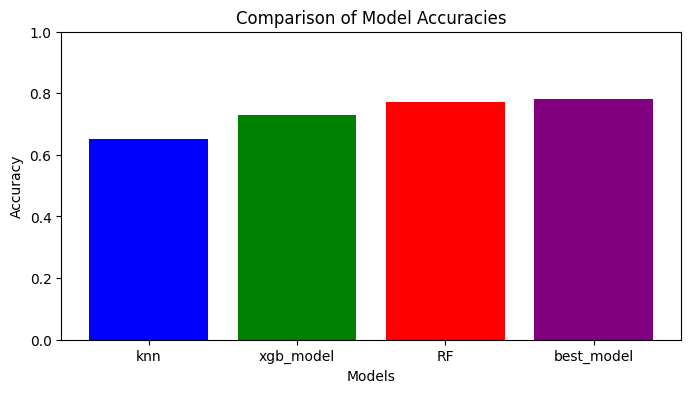

In [ ]:
model_names = ['knn', 'xgb_model', 'RF', "best_model"]
accuracies = [0.65,0.73, 0.77,0.78091]

plt.figure(figsize=(8, 4))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

In [ ]:
df = pd.read_csv('')

In [ ]:
X_train = df.drop('Baselinehistological staging', axis=1)
y_train = df['Baselinehistological staging']


NameError: name 'df' is not defined

In [ ]:
random_search.fit(X_train, y_train)

random_search.predict([[0.895838, 1.114101, -0.844365, -0.887729, -0.664772, -1.531364, -1.500935, 0.187086, -1.402204, 1.]])

NameError: name 'X_train' is not defined

In [ ]:
X_test = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15],
          [16, 17, 18], [19, 20, 21], [22, 23, 24], [25, 26, 27], [28, 29, 30]]
y_test = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
X_test_10_points = X_test [:10]
y_test_10_points = y_test[:10]

In [ ]:
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test_10_points)
predictions = random_search.predict(X_test_scaled)

print("Predictions for 10 data points:")
print(predictions)

Predictions for 10 data points:
[0 1 1 1 0 0 1 0 1 1]


In [ ]:
binary_predictions = (predictions > 0.5).astype(int)

accuracy = accuracy_score(y_test_10_points, binary_predictions)

print ("Accuracy for 10 data points:", accuracy)

Accuracy for 10 data points: 0.7


In [ ]:
import pickle

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import pickle
X_train = [[1, 2], [3, 4], [5, 6], [7, 8]]
y_train = [0, 1, 0, 1]

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_grid, n_iter=100, cv=2, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)
pickle.dump(random_search, open("BHS_file.pk1","wb"))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 27 is smaller than n_iter=100. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 27 candidates, totalling 54 fits
